[参考](http://efavdb.com/bike-share-forecasting/)。

作者源代码：https://github.com/EFavDB/bike-forecast/blob/master/bikeForcast.py

In [3]:
import pandas as pd

train = pd.read_csv('../input/train.csv', parse_dates=[0])
test = pd.read_csv('../input/test.csv', parse_dates=[0])

## 特征工程

In [5]:
# temp 是临时变量
temp = pd.DatetimeIndex(train['datetime'])
train['year'] = temp.year
train['month'] = temp.month
train['hour'] = temp.hour
train['weekday'] = temp.weekday

In [6]:
temp = pd.DatetimeIndex(test['datetime'])
test['year'] = temp.year
test['month'] = temp.month
test['hour'] = temp.hour
test['weekday'] = temp.weekday

In [7]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,4,5


In [9]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,weekday
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,0,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,1,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,2,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,4,3


## 评估指标 RMSLE

In [11]:
for col in ['casual', 'registered', 'count']:
    train['log-' + col] = train[col].apply(lambda x: np.log1p(x))

In [14]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,weekday,log-casual,log-registered,log-count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,0,5,1.386294,2.639057,2.833213
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5,2.197225,3.496508,3.713572
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,2,5,1.791759,3.332205,3.496508
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,3,5,1.386294,2.397895,2.639057
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,4,5,0.000000,0.693147,0.693147


In [8]:
# Define features vector
features = [
    'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity',
    'windspeed', 'year', 'month', 'weekday', 'hour'
]

In [15]:
from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor(n_estimators=200, max_depth=3)
clf.fit(train[features], train['log-count'])

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [17]:
result = clf.predict(test[features])
result = np.expm1(result)

In [18]:
df = pd.DataFrame({'datetime': test['datetime'], 'count': result})
df.to_csv('../output/gbr-results1.csv', index=False, columns=['datetime', 'count'])

## 调参

In [19]:
temp = pd.DatetimeIndex(train['datetime'])
temp

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               ...
               '2012-12-19 14:00:00', '2012-12-19 15:00:00',
               '2012-12-19 16:00:00', '2012-12-19 17:00:00',
               '2012-12-19 18:00:00', '2012-12-19 19:00:00',
               '2012-12-19 20:00:00', '2012-12-19 21:00:00',
               '2012-12-19 22:00:00', '2012-12-19 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=10886, freq=None)

In [20]:
# Split data into training and validation sets
temp = pd.DatetimeIndex(train['datetime'])
temp

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               ...
               '2012-12-19 14:00:00', '2012-12-19 15:00:00',
               '2012-12-19 16:00:00', '2012-12-19 17:00:00',
               '2012-12-19 18:00:00', '2012-12-19 19:00:00',
               '2012-12-19 20:00:00', '2012-12-19 21:00:00',
               '2012-12-19 22:00:00', '2012-12-19 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=10886, freq=None)

In [22]:
# 按照日期划分训练集和验证集
training = train[temp.day <= 16]
validation = train[temp.day > 16]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,weekday,log-casual,log-registered,log-count
372,2011-01-17 00:00:00,1,1,0,2,8.20,9.850,47,15.0013,1,16,17,2011,1,0,0,0.693147,2.833213,2.890372
373,2011-01-17 01:00:00,1,1,0,2,8.20,9.850,44,12.9980,1,15,16,2011,1,1,0,0.693147,2.772589,2.833213
374,2011-01-17 02:00:00,1,1,0,2,7.38,8.335,43,16.9979,0,8,8,2011,1,2,0,0.000000,2.197225,2.197225
375,2011-01-17 03:00:00,1,1,0,2,7.38,9.090,43,12.9980,0,2,2,2011,1,3,0,0.000000,1.098612,1.098612
376,2011-01-17 04:00:00,1,1,0,2,7.38,9.850,43,8.9981,1,2,3,2011,1,4,0,0.693147,1.098612,1.386294
377,2011-01-17 05:00:00,1,1,0,2,7.38,9.850,43,11.0014,0,1,1,2011,1,5,0,0.000000,0.693147,0.693147
378,2011-01-17 06:00:00,1,1,0,2,7.38,9.090,43,12.9980,0,5,5,2011,1,6,0,0.000000,1.791759,1.791759
379,2011-01-17 07:00:00,1,1,0,2,6.56,9.090,50,8.9981,4,9,13,2011,1,7,0,1.609438,2.302585,2.639057
380,2011-01-17 08:00:00,1,1,0,2,6.56,7.575,47,15.0013,3,30,33,2011,1,8,0,1.386294,3.433987,3.526361
381,2011-01-17 09:00:00,1,1,0,2,6.56,7.575,47,15.0013,8,39,47,2011,1,9,0,2.197225,3.688879,3.871201


In [23]:
param_grid = {
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [10, 15, 20],
    'min_samples_leaf': [3, 5, 10, 20],
}

下面这行代码耗时。

In [25]:
%%time 
from sklearn.model_selection import GridSearchCV

est = GradientBoostingRegressor(n_estimators=500)
gs_cv = GridSearchCV(
    est, param_grid, n_jobs=4).fit(training[features], training['log-count'])

/Users/liwei/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [26]:
# best hyperparameter setting
gs_cv.best_params_

{'learning_rate': 0.05, 'max_depth': 10, 'min_samples_leaf': 20}

In [34]:
from sklearn.metrics import mean_absolute_error

# Baseline error
error_count = mean_absolute_error(validation['log-count'],
                                 gs_cv.predict(validation[features]))
error_count

0.2100712735981376

In [35]:
result = gs_cv.predict(test[features])
result = np.expm1(result)
df = pd.DataFrame({'datetime': test['datetime'], 'count': result})
df.to_csv(
    '../output/gbr-results2.csv', index=False, columns=['datetime', 'count'])

In [36]:
error_train = []
error_validation = []
for k in range(10, 501, 10):
    clf = ensemble.GradientBoostingRegressor(
        n_estimators=k, learning_rate=.05, max_depth=10, min_samples_leaf=20)

    clf.fit(training[features], training['log-count'])
    result = clf.predict(training[features])
    error_train.append(mean_absolute_error(result, training['log-count']))

    result = clf.predict(validation[features])
    error_validation.append(
        mean_absolute_error(result, validation['log-count']))

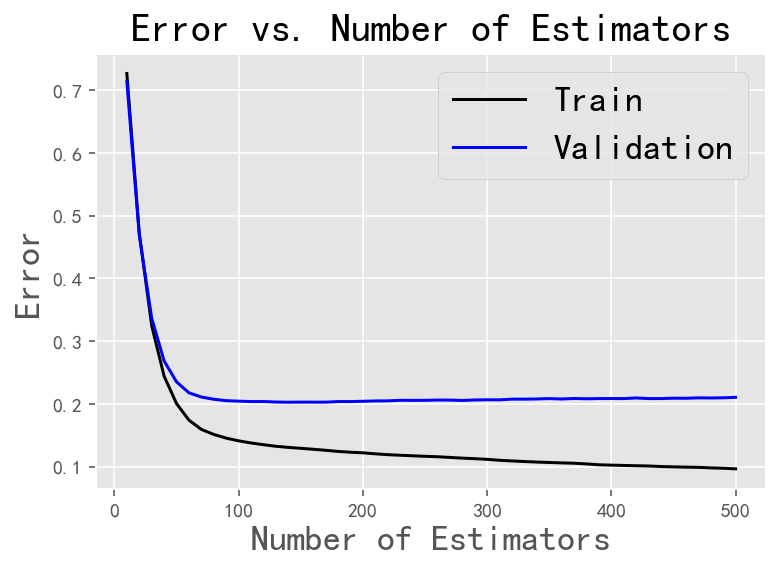

In [37]:
# Plot the data
x = range(10, 501, 10)
plt.style.use('ggplot')
plt.plot(x, error_train, 'k')
plt.plot(x, error_validation, 'b')
plt.xlabel('Number of Estimators', fontsize=18)
plt.ylabel('Error', fontsize=18)
plt.legend(['Train', 'Validation'], fontsize=18)
plt.title('Error vs. Number of Estimators', fontsize=20)
plt.show()

In [38]:
def merge_predict(model1, model2, test_data):
    #    Combine the predictions of two separately trained models.
    #    The input models are in the log domain and returns the predictions
    #    in original domain.
    p1 = np.expm1(model1.predict(test_data))
    p2 = np.expm1(model2.predict(test_data))
    p_total = (p1 + p2)
    return (p_total)

In [39]:
param_grid2 = {
    'max_depth': [10, 15, 20],
    'min_samples_leaf': [3, 5, 10, 20],
}

In [40]:
est_casual = GradientBoostingRegressor(n_estimators=80, learning_rate=.05)
gs_casual = GridSearchCV(
    est_casual, param_grid2, n_jobs=4).fit(training[features],
                                           training['log-casual'])

/Users/liwei/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [41]:
est_registered = GradientBoostingRegressor(n_estimators=80, learning_rate=.05)
gs_registered = GridSearchCV(
    est_registered, param_grid2, n_jobs=4).fit(training[features],
                                               training['log-registered'])

/Users/liwei/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [44]:
gs_casual.best_params_

{'max_depth': 10, 'min_samples_leaf': 20}

In [43]:
gs_registered.best_params_

{'max_depth': 10, 'min_samples_leaf': 20}

In [45]:
result3 = merge_predict(gs_casual, gs_registered, test[features])
df = pd.DataFrame({'datetime': test['datetime'], 'count': result3})
df.to_csv('../output/results3.csv', index=False, columns=['datetime', 'count'])

In [46]:
est_casual = GradientBoostingRegressor(
    n_estimators=80, learning_rate=.05, max_depth=10, min_samples_leaf=20)

est_registered = GradientBoostingRegressor(
    n_estimators=80, learning_rate=.05, max_depth=10, min_samples_leaf=20)

est_casual.fit(train[features].values, train['log-casual'].values)
est_registered.fit(train[features].values, train['log-registered'].values)
result4 = merge_predict(est_casual, est_registered, test[features])

df = pd.DataFrame({'datetime': test['datetime'], 'count': result4})
df.to_csv('../output/results4.csv', index=False, columns=['datetime', 'count'])
# 0.41892